# Imports 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Data

In [5]:
salaries = pd.read_csv('data/salaries.csv')
salaries

,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Gross
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
3,0,26,Operations,3,8.0,6,44375
4,0,29,Engineering,0,9.5,25,235405


## Plotagem dos dados usando a biblioteca Seaborn

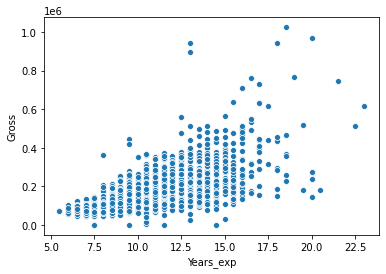

In [6]:
sns.scatterplot(data=salaries, x='Years_exp', y='Gross')

### Comparação entre salário de homens('0') e mulheres('1')
#### homens: '0', mulheres: '1'

In [47]:
unicos = (salaries['Department'].append(salaries['Department_code'])).unique()
unicos2 = [j for j in range(int(len(unicos)/2))]
for i in range(int(len(unicos)/2)):
    unicos2[i] = unicos[i]+' '+'{}'.format(unicos[i+8])
unicos2 = sorted(unicos2, key = lambda x:x[-1])
cabecalho = 'Department Department_code'
unicos2.insert(0,cabecalho)
unicos2

['Department Department_code',
 'Engineering 0',
 'Finance 1',
 'Media 2',
 'Operations 3',
 'Other 4',
 'Product 5',
 'Sales 6',
 'Tech 7']

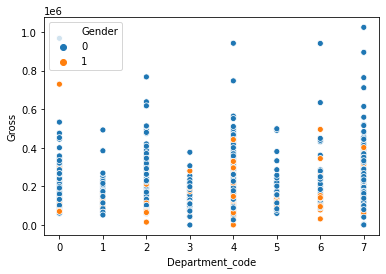

In [15]:
sns.scatterplot(data=salaries, x='Department_code', y='Gross', hue='Gender')

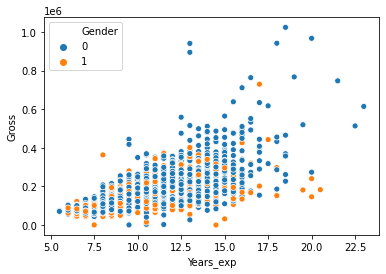

In [16]:
sns.scatterplot(data=salaries, x='Years_exp', y='Gross', hue='Gender')

### Média com os dados agrupados

In [12]:
salaries.groupby('Gender').mean()['Gross']

Gender
0    189332.347659
1    140560.250501
Name: Gross, dtype: float64

## Modelo de regressão linear

In [49]:
inputs = salaries.drop(['Gross', 'Department'], axis='columns') # Remover a coluna "Department", pois é texto
output = salaries[['Gross']] # Gross é a saída

In [51]:
inputs.head()

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
3,0,26,3,8.0,6
4,0,29,0,9.5,25


In [52]:
output.head()

,Gross
0,74922
1,44375
2,82263
3,44375
4,235405


### Inicializando o modelo

In [54]:
model = LinearRegression()

### Treinando o modelo

In [55]:
model.fit(inputs, output)

LinearRegression()

### Score do modelo

In [57]:
model.score(inputs, output) # Isso não é a precisão do modelo, mas a capacidade de prever
                            # em torno de 40-45% de mudança no salário, porém só os dados 
                            # de treino foram utilizados

0.43754799942321343

### Previsão de valores

In [64]:
new =[[[1,15,7,5.2,10]], [[1,26,0,1.2,16]],[[0,26, 0, 1.2,16]], [[1,23,4,2.7,5]] , [[0,23,4,2.7,5]]]
for i in new:
    print(model.predict(i))

[[-27110.0654953]]
[[43129.3346435]]
[[67375.04133689]]
[[28492.97300192]]
[[52738.67969531]]


## Explicando o modelo

### Coeficientes do modelo: mostra o quanto a saída varia quando muda em 1 cada característica da entrada enquanto se mantém constante as outras.

In [68]:
pd.concat([pd.DataFrame(inputs.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,Gender,-24245.706693
1,Age,9467.180237
2,Department_code,2351.484501
3,Years_exp,4733.590118
4,Tenure (months),249.194919


In [70]:
### Abaixo é o valor da saída quando todas as entradas é zero.

In [69]:
model.intercept_

array([-188439.07166781])